# Road Maintenance

## Description
- Each year, millions of dollars are invested on road maintenance and reparation all over the world. To minimize costs, one of the main aspects is the early detection of those flaws. Once roads are built, cracks in the asphalt surface may arise due to several different problems. Depending on the severity, those cracks in the road can be aggravated if they are not quickly repaired. The sooner those flaws in the pavement are repaired, the less expensive the repairs are. Almost every modern country has thousands of kilometers of roads. Visual inspection of the roads has been the most common technique for the maintenance of the asphalt. With such large road networks, it is expensive and difficult to correctly maintain so many kilometers of asphalt with the limited resources that any public administration has. Thus, new tools to automatically examine roads in an efficient way should be developed.

## Task
- The task is to apply image processing techniques to detect damages/cracks on a road, as shown in the provided image.

## Explanation
1. First, we have to import the required libraries.
    - cv2: OpenCV library for image processing tasks.
    - numpy: Library for numerical operations on arrays.
    - matplotlib.pyplot: Library for plotting and visualization.
2. User Defined Functions: N/A
3. Image Conversion:
    - Convert image from BGR to grayscale: The cv2.cvtColor() function is used to convert the input image from the default BGR (Blue-Green-Red) color space to grayscale. Grayscale conversion simplifies further image processing operations.
4. Image Preparation:
    - Gaussian Blur: The cv2.GaussianBlur() function is applied to the image to smooth out the edges and reduce noise, which helps improve the accuracy of subsequent edge detection.
    - Dilation: The cv2.dilate() function is used to thicken the detected edges, making them more prominent and easier to identify.
5. Explanation of Code:
    - Canny Edge Detection: The cv2.Canny() function is used to perform edge detection on the preprocessed grayscale image. It identifies edges based on intensity gradients and thresholds provided.
    - Contour Detection: The cv2.findContours() function is applied to find contours in the dilated edge image. Contours are the boundaries of connected components in an image.
    - Contour Drawing: The cv2.drawContours() function is used to draw the detected contours on the original image. Green color (0, 255, 0) is used to represent the contours.
    - ROI Expansion: Another dilation operation is performed on the Canny edge image to expand the region of interest (ROI). This helps cover a wider area around the detected edges.
    - Final Contour Drawing: The expanded ROI is used to find contours again, and the most significant contour is drawn on the original image with a thicker green line.
6. Additional Methods Used: N/A
7. Difficulty Faced:
    - One possible difficulty could be selecting the appropriate parameters for the edge detection and dilation operations. Adjusting the thresholds in the cv2.Canny() function and the kernel size in cv2.dilate() might require experimentation to achieve the desired results.
    - Another challenge could arise in choosing the correct contour(s) to represent the road damages. Depending on the image and its characteristics, it may be necessary to fine-tune the contour selection process to accurately identify the road cracks.


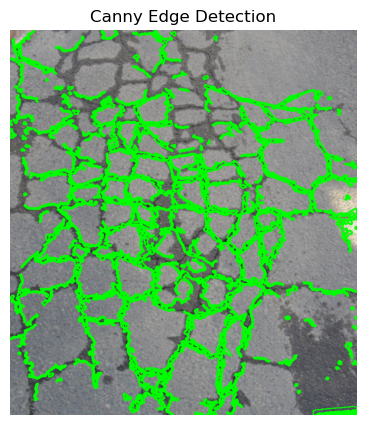

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'Images/test.jpg'

# read the image
img = cv2.imread(img_path)

# apply gaussian blur to make the edges smoother
img = cv2.GaussianBlur(img, (7,7), 1.25)

# convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply canny edge detection
img_canny = cv2.Canny(img_gray, 80, 230)

# apply dilation to make the edges thicker
kernel = np.ones((3,3))
img_dilate = cv2.dilate(img_canny, kernel, iterations=1)

# find the contours
contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw the contours
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Grow the region of interest (ROI) by applying dilation
kernel = np.ones((3,3))
img_dilate = cv2.dilate(img_canny, kernel, iterations=10)

# find the contours
contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw the contours
cv2.drawContours(img, contours, 0, (0, 255, 0), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.title('Canny Edge Detection')
plt.axis('off')
plt.imshow(img_rgb)
plt.show()

